In [1]:
%load_ext autoreload
%autoreload 2

Libraries

In [2]:
import os
import pandas as pd
import numpy as np
from verbio import readers, preprocessing, temporal, features, settings
from collections import defaultdict

Constants

In [3]:
SUBJECT_LABELS = [f'P{p:03d}' for p in range(1, 74, 1)] # Participants 001-073
TRAIN_SESSIONS = ['TEST01','TEST02','TEST03','TEST04']
TEST_SESSIONS = ['TEST05','TEST06','TEST07','TEST08']
DATA_DIR = '/home/jason/hubbs/project_verbio/data/raw/'
ANNOTATION_FILENAME = 'MANUAL_ANNOTATION_PPT.xlsx'

Helper functions

In [10]:
def get_data(participant, session):
    
    annotation_filepath = os.path.join(DATA_DIR, participant, session, ANNOTATION_FILENAME)
    if not os.path.exists(annotation_filepath): return None
    
    annotation_df = readers.read_excel(annotation_filepath)
    return annotation_df.drop(settings.time_key, axis=1)

Grab raw data from VerBIO dataset for training and testing sessions

In [12]:
annotations = {}

for p in SUBJECT_LABELS:
    valid = True
    participant_train = []
    participant_test = []

    for s in TRAIN_SESSIONS:
        session_data = get_data(p, s)
        if session_data is None:
            valid = False
            break
        else:
            participant_train.append(session_data)
    
    for s in TEST_SESSIONS:
        session_data = get_data(p, s)
        if session_data is None:
            valid = False
            break
        else:
            participant_test.append(session_data)
            
    if valid:
        print(f'Valid participant {p}')
        annotations[p] = pd.concat(participant_train + participant_test, axis=0)

Valid participant P004
Valid participant P005
Valid participant P008
Valid participant P016
Valid participant P020
Valid participant P021
Valid participant P023
Valid participant P032
Valid participant P035
Valid participant P037
Valid participant P038
Valid participant P039
Valid participant P041
Valid participant P042
Valid participant P044
Valid participant P046
Valid participant P047
Valid participant P050
Valid participant P051
Valid participant P053
Valid participant P058
Valid participant P060
Valid participant P061
Valid participant P062
Valid participant P065
Valid participant P071
Valid participant P073


Individual participants, separated by annotator

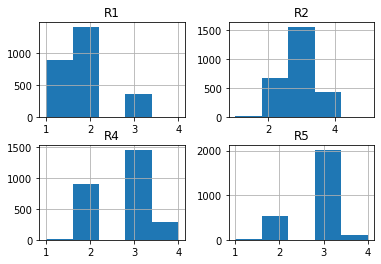

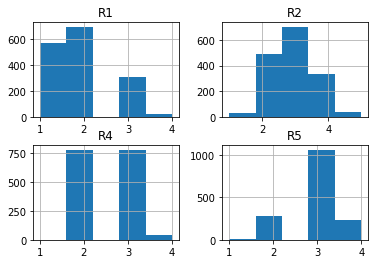

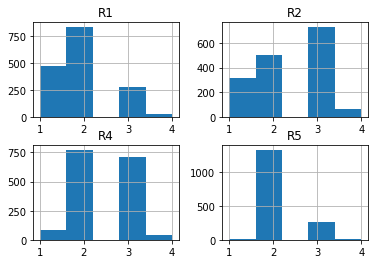

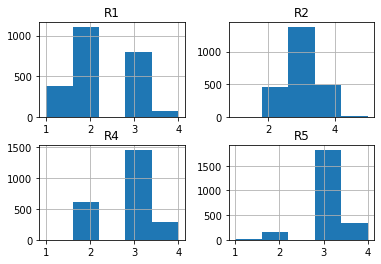

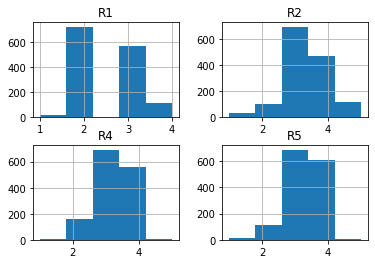

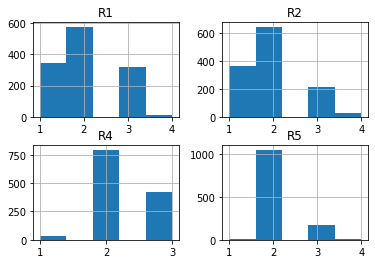

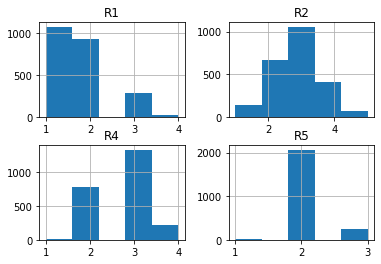

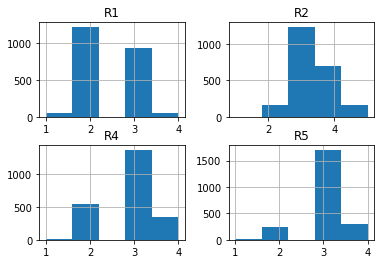

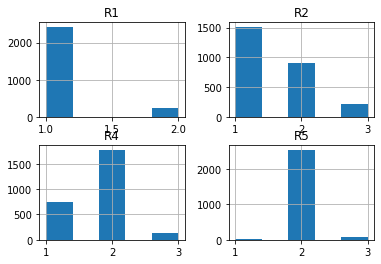

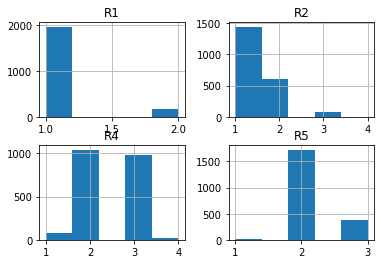

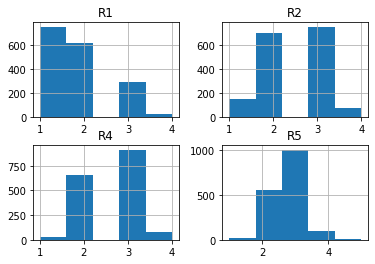

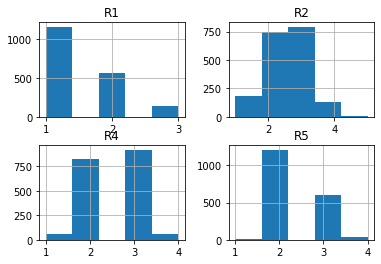

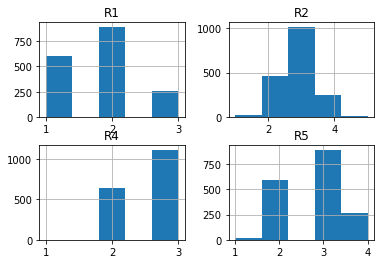

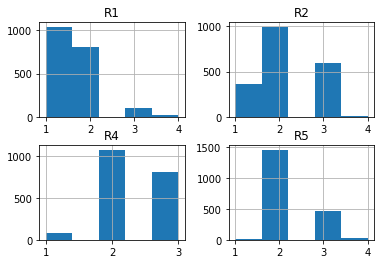

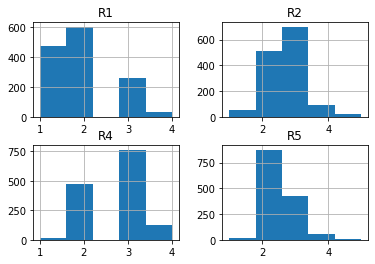

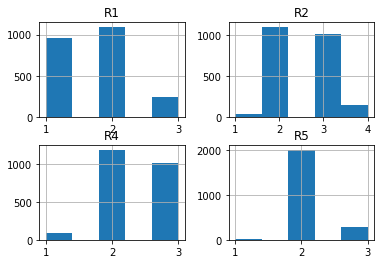

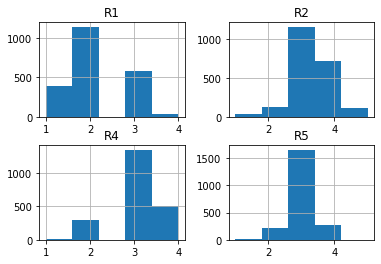

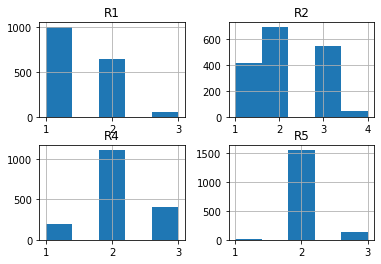

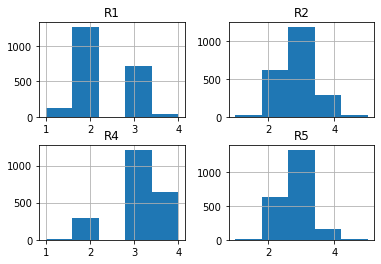

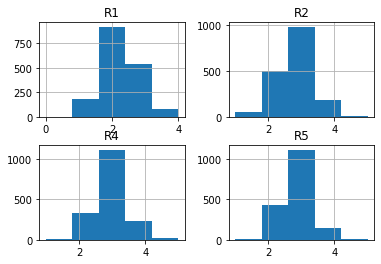

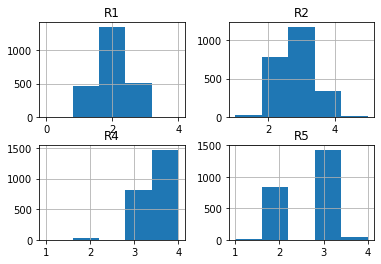

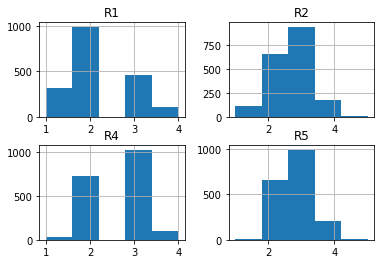

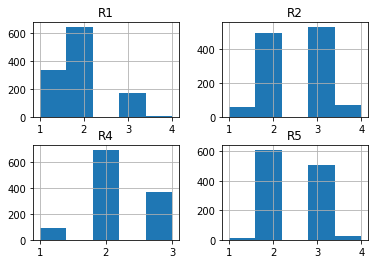

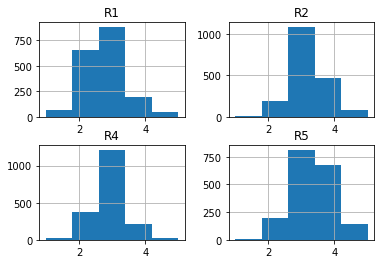

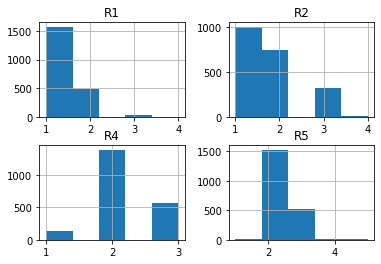

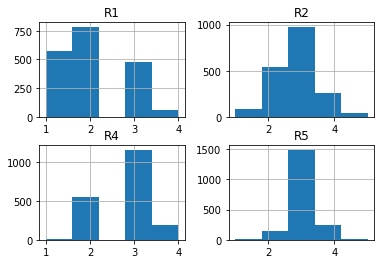

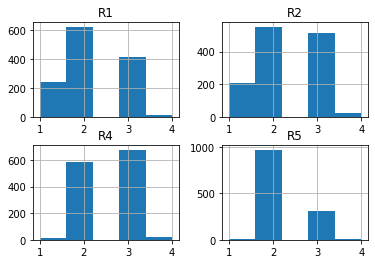

In [27]:
for p in annotations.keys():
    hist = annotations[p].hist(bins=5)

Each participant average across session, averaged by annotator

In [36]:
values = []
for p in annotations.keys():
    values.append(annotations[p].mean(axis=0).mean())
for v in values:
    print(f'{v:.2f}')

2.58
2.57
2.22
2.80
3.13
2.09
2.34
2.93
1.60
1.77
2.38
2.20
2.53
2.08
2.41
2.19
2.90
1.94
2.78
2.71
2.77
2.56
2.28
3.07
1.86
2.67
2.30


All participants separated by annotator

array([[<AxesSubplot:title={'center':'R1'}>,
        <AxesSubplot:title={'center':'R2'}>],
       [<AxesSubplot:title={'center':'R4'}>,
        <AxesSubplot:title={'center':'R5'}>]], dtype=object)

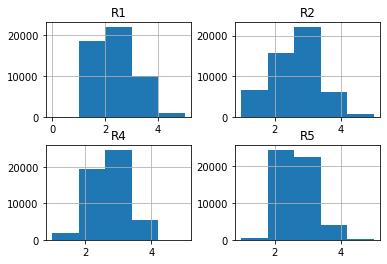

In [28]:
all_annotations = pd.concat(annotations.values(), axis=0)
_ = all_annotations.hist(bins=5)

All participants averaged, medianed, and maxed

<AxesSubplot:>

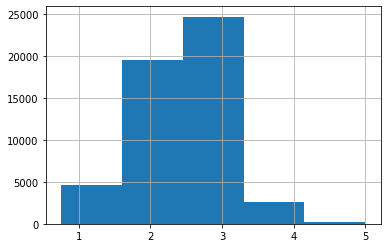

In [29]:
_ = all_annotations.mean(axis=1).hist(bins=5)

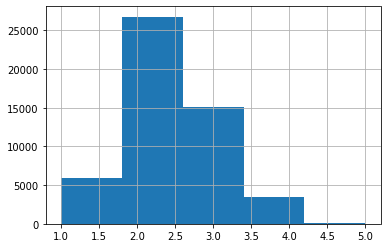

In [31]:
_ = all_annotations.median(axis=1).hist(bins=5)

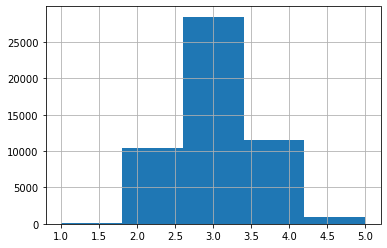

In [32]:
_ = all_annotations.max(axis=1).hist(bins=5)